# Oppgave 5

<h3>Del A: Visualiser en isoterm kompresjon</h3>

Her benyttes termoPy biblioteket for å finne ukjente mengder til en ideell gass, og deretter plotting av en isoterm process

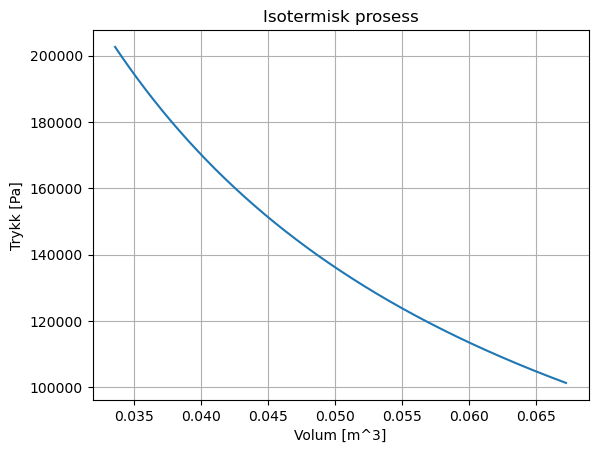

(array([0.06721783, 0.06721447, 0.06721111, ..., 0.03361564, 0.03361228,
        0.03360891]),
 array([101300.        , 101305.06575986, 101310.13202641, ...,
        202559.48405159, 202579.74      , 202600.        ]))

In [45]:
import termoPy as TP
import matplotlib.pyplot as plt
import numpy as np

atm = 101300; L = 0.001

initial_volume = TP.IdealGas(n=3,P1=1*atm,T1=273).V1
final_volume = initial_volume*0.50

isoterm_prosess = TP.Isothermal(n=3,T1=273,P1=1*atm)
isoterm_prosess.generate_data_from_dV(V2=final_volume,show=True)


<h3>Del B: Visualiser en adiabatisk kompresjon</h3>

Vi benytter igjen termoPy biblioteket for å plotte den adiabatiske kompresjonen.

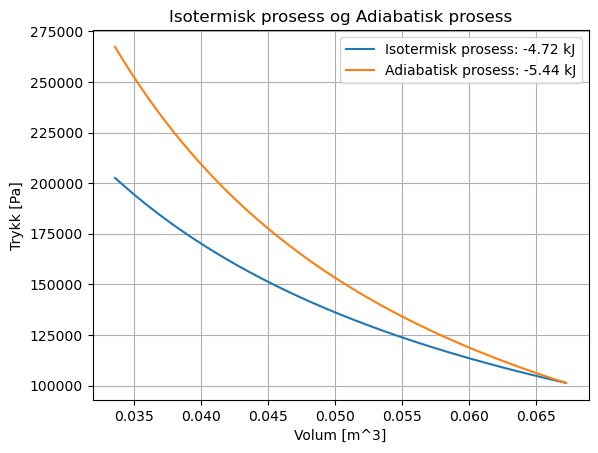

In [40]:
adiabatisk_prosess = TP.Adiabatic(n=3,gamma=7/5,T1=273,P1=1*atm,diatomic=True)
adiabatisk_prosess.generate_data_from_dV(V2=final_volume)

def plot_processes(A,B):

    plot_title = A.title + " og " + B.title

    plt.title(plot_title)
    plt.xlabel("Volum [m^3]")
    plt.ylabel("Trykk [Pa]")
    plt.plot(A.volume,A.pressure,label=f"{A.title}: {A.calculate_work_done_by()/1000:.2f} kJ")
    plt.plot(B.volume,B.pressure,label=f"{B.title}: {B.calculate_work_done_by()/1000:.2f} kJ")
    plt.legend()
    plt.grid()
    plt.savefig(f"data/{plot_title}_DelB.png")
    plt.show()


plot_processes(isoterm_prosess,adiabatisk_prosess)

# Regner på disse nye gassene

Arbeidet gjort i Isotermisk prosess er: -8.15 kJ
Arbeidet gjort i Adiabatisk prosess er: -11.4 kJ
Forskjellen i forventet arbeid er:
for isotermisk: 8143.65 J
for Adiabatisk: 11431.08 J



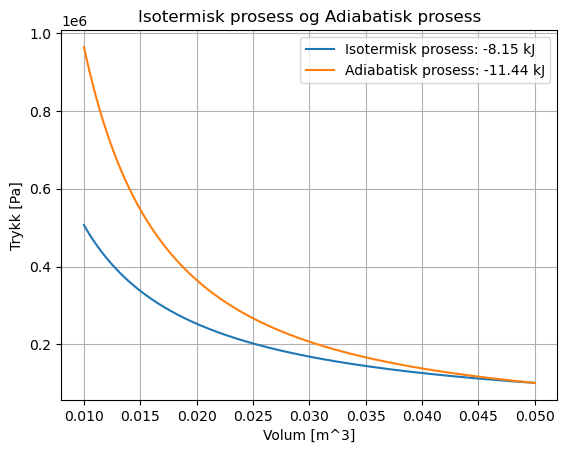

In [33]:
import termoPy as TP

mol = TP.IdealGas(P1=1*atm,V1=50*L,T1=273).n

P  = 1.0 * atm
T = 273
V1 = 50*L
V2 = 10*L
k = 1000000

isoterm_prosess    = TP.Isothermal(n=mol, T1 = T, V1 = V1, P1 = P)
adiabatisk_prosess = TP.Adiabatic(n=mol, T1 = T, V1 = V1, P1 = P,gamma = 7/5,diatomic=True)

isoterm_prosess.generate_data_from_dV(V2,steps=k)
adiabatisk_prosess.generate_data_from_dV(V2,steps=k)

def integrate(A):
    dV = (V2-V1)/k
    arbeid = dV*np.sum(A.pressure)/1000
    print(f"Arbeidet gjort i {A.title} er: {arbeid:.3g} kJ")
    return arbeid

iso_arbeid = integrate(isoterm_prosess)
adi_arbeid = integrate(adiabatisk_prosess)

print(f"""Forskjellen i forventet arbeid er:
for isotermisk: {abs(isoterm_prosess.calculate_work_done_by()-iso_arbeid):.2f} J
for Adiabatisk: {abs(adiabatisk_prosess.calculate_work_done_by()-adi_arbeid):.2f} J
""")

plot_processes(isoterm_prosess,adiabatisk_prosess)

In [7]:
isokor_prosess = TP.Isochoric(n=mol,T1=273,P1=1*atm)
print(isokor_prosess.V1)
#isokor_prosess.generate_data_from_dP(P2=2*atm,show=True)

0.04999999999999999
